
- **What is a Decision Tree?**
- **Types of Decision Trees**
- **When to use a Decision Tree**
- **Data requirements and distributions**
- **How to implement a Decision Tree in Python**
- **Visualizing the Decision Tree**

---


# Decision Tree Algorithm

A **Decision Tree** is a powerful and interpretable algorithm used for both classification and regression tasks. It works by recursively splitting the data into subsets based on feature values, leading to a tree structure where each internal node represents a "decision" and each leaf node represents the outcome.

---

## 1. What is a Decision Tree?

A **Decision Tree** splits a dataset into smaller subsets while at the same time an associated decision tree is incrementally developed. At each split (or node), the tree makes decisions by selecting the feature that provides the best split of the data (according to a criterion like **Gini impurity** or **Information Gain**).

- **Nodes** represent tests on attributes.
- **Edges** represent the outcome of the test (true/false).
- **Leaves** represent the class label or predicted value.

---

## 2. Types of Decision Trees

### 2.1 Classification Trees (CART)

- **Purpose**: Used for **classification** tasks where the output is categorical.
- **Splitting Criterion**: Often uses **Gini Impurity** or **Entropy** (Information Gain) to determine the best splits.
  
### 2.2 Regression Trees

- **Purpose**: Used for **regression** tasks where the output is continuous.
- **Splitting Criterion**: Uses metrics like **Mean Squared Error (MSE)** or **Mean Absolute Error (MAE)** to determine splits.

---

## 3. When to Use a Decision Tree

- **When your data is non-linear**: Decision trees can model complex, non-linear relationships between features and target variables.
- **Interpretable models**: Decision trees are great when interpretability is important because they can be easily visualized and understood.
- **Handles mixed data types**: Can handle both categorical and numerical data.
- **Requires minimal data preprocessing**: No need for feature scaling or normalization.

**Limitations**:
- **Overfitting**: Decision trees can easily overfit the training data, especially if they are deep.
- **Sensitive to data**: Small changes in the data can result in large changes in the tree structure.

---

## 4. Data Requirements and Distributions

Decision trees work with a wide range of data distributions, but the splitting criteria (e.g., Gini or Entropy) are sensitive to the distribution of the target variable. Let’s look at common data distributions and how they relate to decision trees:

### 4.1 Data with Clear, Non-Overlapping Boundaries

Decision trees perform well when the data has clear boundaries between classes (for classification) or where the dependent variable varies with specific feature thresholds (for regression).

- **Example**: Predicting whether a person will buy a house based on income (clear threshold).

### 4.2 Categorical Data

Decision trees handle categorical data naturally, splitting based on the values of categorical variables.

- **Example**: Predicting the type of pet based on features like fur type (categorical values).

### 4.3 Data with Overlapping Class Distributions

When the classes overlap significantly (i.e., when two or more classes share similar feature values), decision trees can struggle, leading to overfitting unless pruned.

- **Example**: In a dataset where both cats and dogs have similar weight, splitting purely based on weight could be misleading.

### 4.4 Multimodal Distributions

In cases of **multimodal distributions**, decision trees might need more depth to accurately separate the distinct modes in the data.

- **Example**: Age distribution of customers (children, adults, seniors).

### 4.5 Skewed Data

For **skewed distributions**, decision trees might bias towards the majority class (for classification) or extreme values (for regression). It’s important to handle class imbalance by techniques like **pruning**, **maximum depth control**, or **class weighting**.

---

## 5. How to Use Decision Trees in Python

Let’s see how to implement Decision Trees using `scikit-learn`.

### 5.1 Classification Example (with Visualizations)

```python
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

# Load dataset (Iris dataset)
data = load_iris()
X = data.data
y = data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=3)

# Train the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Visualize the tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()
```

### 5.2 Regression Example

```python
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Generate regression dataset
X, y = make_regression(n_samples=1000, n_features=1, noise=0.1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Decision Tree Regressor
regressor = DecisionTreeRegressor(max_depth=4)

# Train the model
regressor.fit(X_train, y_train)

# Predict on test data
y_pred = regressor.predict(X_test)

# Plot the results
plt.scatter(X_test, y_test, color='blue', label='True values')
plt.scatter(X_test, y_pred, color='red', label='Predictions', alpha=0.6)
plt.title('Decision Tree Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()
```

---

## 6. Visualizing Decision Boundaries

One of the key advantages of decision trees is that they can be visualized and interpreted. Here’s how to visualize the **decision boundaries** of a decision tree model in 2D.

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

# Generate a 2D classification dataset
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_informative=2, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

# Create a meshgrid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict class probabilities for each point in the grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', marker='o')
plt.title('Decision Tree Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
```

---

## 7. Pruning and Regularization

Decision trees can be prone to **overfitting**, especially if allowed to grow deep. To avoid overfitting, consider the following methods:

- **Pruning**: Removing branches of the tree that have little importance. This can be done by limiting the tree’s **maximum depth**, or by requiring a minimum number of samples at each leaf.
- **Regularization Parameters**:
  - `max_depth`: Limits the maximum depth of the tree.
  - `min_samples_split`: The minimum number of samples required to split an internal node.
  - `min_samples_leaf`: The minimum number of samples required to be at a leaf node.

### Example of Limiting Tree Depth:

```python
clf = DecisionTreeClassifier(max_depth=4, min_samples_split=10, min_samples_leaf=5)
clf.fit(X_train, y_train)
```

---

## 8. Conclusion

Decision Trees are a flexible and powerful machine learning algorithm that can handle both classification and regression tasks. Their ability to handle different types of data (numerical, categorical) and interpretability make them an attractive choice in many scenarios.

However, be mindful of the potential for **overfitting** and always consider techniques like **pruning** and **

regularization** to ensure your model generalizes well.

### Key Takeaways:
- **Classification and regression**: Decision trees can handle both.
- **Interpretable**: They are easy to visualize and understand.
- **Data preprocessing**: Minimal data preprocessing is required.
- **Overfitting**: Watch out for overfitting and use pruning techniques.

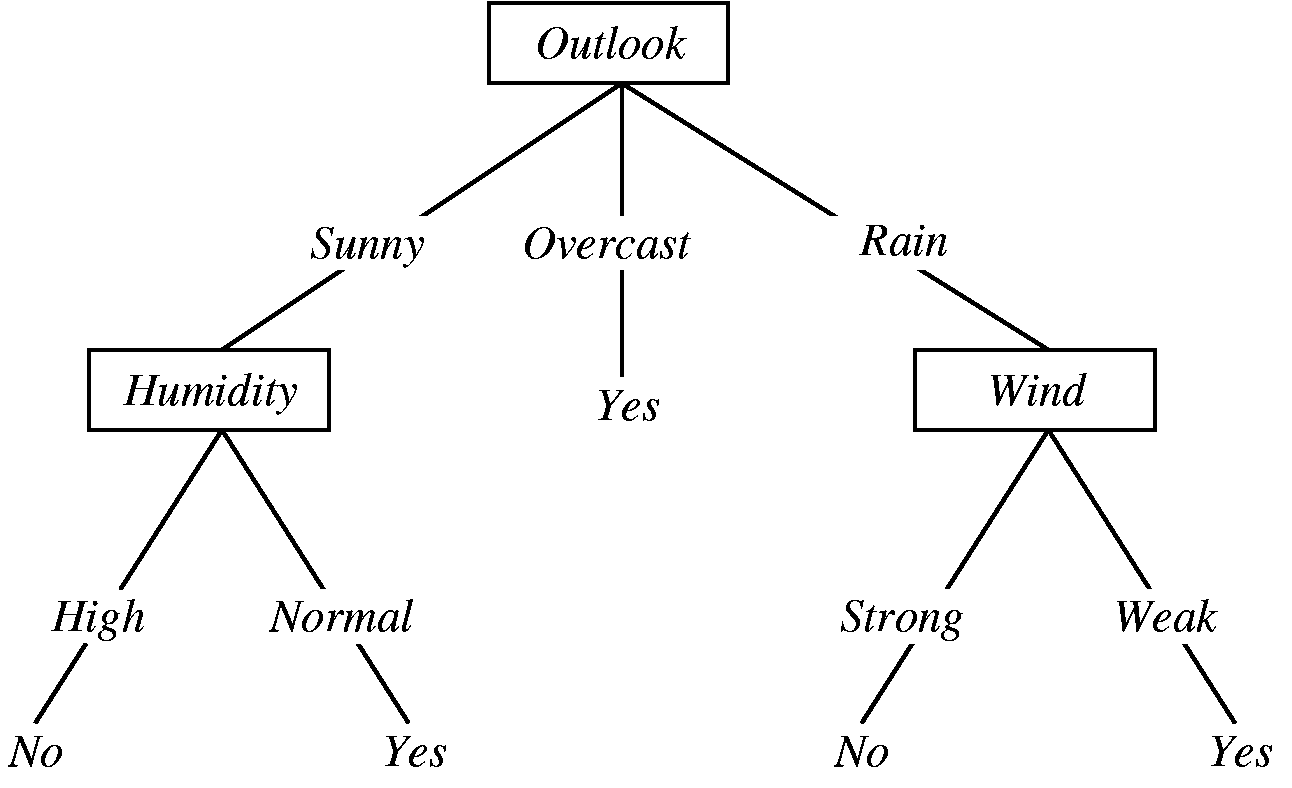